In [1]:
import csv
from io import BytesIO
import requests
import pdfplumber
import os
import pikepdf
import pandas as pd
import tabula
from bs4 import BeautifulSoup
from PyPDF2 import PdfReader, PdfWriter
from pathlib import Path
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import Choropleth
from folium.plugins import HeatMap
from geopy.geocoders import Nominatim
from fuzzywuzzy import process
import geopandas as gpd

In [2]:
p = Path.cwd()
shape_folder = p.parent.parent / "shape"
file_path = shape_folder / "Cont_AAD_CAOP2017.shp"
Freguesia = gpd.read_file(file_path)
Freguesia["Concelho"] = Freguesia["Concelho"].str.title()
Freguesia["Distrito"] = Freguesia["Distrito"].str.title()
Freguesia

,Dicofre,Freguesia,Concelho,Distrito,TAA,AREA_EA_Ha,AREA_T_Ha,Des_Simpli,geometry
0,080106,Albufeira e Olhos de Água,Albufeira,Faro,ÁREA SECUNDÁRIA,0.09,4117.69,Albufeira e Olhos de Água,"POLYGON ((-13243.458 -288011.973, -13244.464 -..."
1,081504,Sagres,Vila Do Bispo,Faro,ÁREA PRINCIPAL,3431.83,3436.91,Sagres,"POLYGON ((-67806.358 -291271.354, -67809.689 -..."
2,080106,Albufeira e Olhos de Água,Albufeira,Faro,ÁREA SECUNDÁRIA,0.01,4117.69,Albufeira e Olhos de Água,"POLYGON ((-15487.120 -287903.523, -15487.725 -..."
3,080106,Albufeira e Olhos de Água,Albufeira,Faro,ÁREA SECUNDÁRIA,0.01,4117.69,Albufeira e Olhos de Água,"POLYGON ((-15520.560 -287893.679, -15521.650 -..."
4,080106,Albufeira e Olhos de Água,Albufeira,Faro,ÁREA SECUNDÁRIA,0.01,4117.69,Albufeira e Olhos de Água,"POLYGON ((-15531.602 -287884.483, -15532.205 -..."
...,...,...,...,...,...,...,...,...,...
3218,160307,Fiães,Melgaço,Viana Do Castelo,ÁREA PRINCIPAL,1121.27,1121.27,Fiães,"POLYGON ((-6958.588 271490.176, -6819.697 2714..."
3219,160323,União das freguesias de Vila e Roussas,Melgaço,Viana Do Castelo,ÁREA PRINCIPAL,1150.87,1150.87,Vila e Roussas,"POLYGON ((-7410.359 271732.200, -7426.438 2717..."
3220,160322,União das freguesias de Prado e Remoães,Melgaço,Viana Do Castelo,ÁREA PRINCIPAL,366.75,366.75,Prado e Remoães,"POLYGON ((-10963.311 272457.595, -10986.160 27..."
3221,160320,União das freguesias de Chaviães e Paços,Melgaço,Viana Do Castelo,ÁREA PRINCIPAL,847.90,847.90,Chaviães e Paços,"POLYGON ((-6958.588 271490.176, -7410.359 2717..."


In [3]:
Freguesia[(Freguesia["Freguesia"].str.contains("União das freguesias de Taveiro, Ameal e Arzila")) & (Freguesia["Concelho"] == "Coimbra")]

,Dicofre,Freguesia,Concelho,Distrito,TAA,AREA_EA_Ha,AREA_T_Ha,Des_Simpli,geometry
1251,060340,"União das freguesias de Taveiro, Ameal e Arzila",Coimbra,Coimbra,ÁREA SECUNDÁRIA,34.97,2433.96,"Taveiro, Ameal e Arzila","POLYGON ((-30373.024 59709.061, -30393.314 597..."
1254,060340,"União das freguesias de Taveiro, Ameal e Arzila",Coimbra,Coimbra,ÁREA PRINCIPAL,2398.99,2433.96,"Taveiro, Ameal e Arzila","POLYGON ((-30769.543 56322.328, -30774.302 562..."


In [4]:
Rural = pd.read_csv("ZonasRuraisRaw.csv")
Rural1 = pd.read_csv("ZonasRuraisRaw.csv")
Rural = Rural[Rural["As Freguesias"] != "Todas as freguesias"].reset_index(drop=True)

In [5]:
Rural["Do Distrito"].unique()

array(['Aveiro', 'Beja', 'Braga', 'Bragança', 'Castelo Branco', 'Coimbra',
       'Faro', 'Guarda', 'Leiria', 'Lisboa', 'Portalegre', 'Porto',
       'Santarém', 'Viana do Castelo', 'Vila Real', 'Viseu', 'Évora'],
      dtype=object)

In [6]:
Rural1

,Do Distrito,Do concelho,As Freguesias
0,Aveiro,Águeda,Todas as freguesias
1,Aveiro,Oliveira de Azeméis,União das freguesias de Nogueira do Cravo e Pi...
2,Aveiro,Oliveira de Azeméis,Vila de Cucujães
3,Aveiro,Oliveira de Azeméis,São Martinho da Gândara
4,Aveiro,Oliveira de Azeméis,Ossela
...,...,...,...
753,Évora,Évora,Canaviais
754,Évora,Évora,União das freguesias de Nossa Senhora da Toure...
755,Évora,Évora,União das freguesias de São Manços e São Vicen...
756,Évora,Vendas Novas,Todas as freguesias


In [7]:
# Obter valores únicos da coluna "Freguesia" do DataFrame "Freguesia"
valores_Distrito = Freguesia['Distrito'].unique()

# Iterar sobre os valores únicos da coluna "As Freguesias" do DataFrame "Rural"
for valor in Rural['Do Distrito'].unique():
    # Verificar se o valor está presente na coluna "Freguesia" do DataFrame "Freguesia"
    if valor not in valores_Distrito:
        # Encontrar o nome mais semelhante na coluna "Freguesia" do DataFrame "Freguesia"
        correspondencia, pontuacao = process.extractOne(valor, valores_Distrito)
        
        # Substituir o valor incorreto pelo nome correspondente
        Rural['Do Distrito'].replace({valor: correspondencia}, inplace=True)

# Exibir o DataFrame "Rural" após a correção dos nomes incorretos
Rural

,Do Distrito,Do concelho,As Freguesias
0,Aveiro,Oliveira de Azeméis,União das freguesias de Nogueira do Cravo e Pi...
1,Aveiro,Oliveira de Azeméis,Vila de Cucujães
2,Aveiro,Oliveira de Azeméis,São Martinho da Gândara
3,Aveiro,Oliveira de Azeméis,Ossela
4,Aveiro,Oliveira de Azeméis,Macieira de Sarnes
...,...,...,...
548,Évora,Évora,Torre de Coelheiros
549,Évora,Évora,Canaviais
550,Évora,Évora,União das freguesias de Nossa Senhora da Toure...
551,Évora,Évora,União das freguesias de São Manços e São Vicen...


In [8]:
# Obter valores únicos da coluna "Freguesia" do DataFrame "Freguesia"
valores_Distrito = Freguesia['Distrito'].unique()

# Iterar sobre os valores únicos da coluna "As Freguesias" do DataFrame "Rural1"
for valor in Rural1['Do Distrito'].unique():
    # Verificar se o valor está presente na coluna "Freguesia" do DataFrame "Freguesia"
    if valor not in valores_Distrito:
        # Encontrar o nome mais semelhante na coluna "Freguesia" do DataFrame "Freguesia"
        correspondencia, pontuacao = process.extractOne(valor, valores_Distrito)
        
        # Substituir o valor incorreto pelo nome correspondente
        Rural1['Do Distrito'].replace({valor: correspondencia}, inplace=True)

# Exibir o DataFrame "Rural1" após a correção dos nomes incorretos
Rural1

,Do Distrito,Do concelho,As Freguesias
0,Aveiro,Águeda,Todas as freguesias
1,Aveiro,Oliveira de Azeméis,União das freguesias de Nogueira do Cravo e Pi...
2,Aveiro,Oliveira de Azeméis,Vila de Cucujães
3,Aveiro,Oliveira de Azeméis,São Martinho da Gândara
4,Aveiro,Oliveira de Azeméis,Ossela
...,...,...,...
753,Évora,Évora,Canaviais
754,Évora,Évora,União das freguesias de Nossa Senhora da Toure...
755,Évora,Évora,União das freguesias de São Manços e São Vicen...
756,Évora,Vendas Novas,Todas as freguesias


In [9]:
# Obter valores únicos da coluna "Concelho" do DataFrame "Freguesia"
valores_concelho = Freguesia[['Concelho', 'Distrito']].apply(lambda x: (x['Concelho'], x['Distrito']), axis=1).tolist()

# Iterar sobre os valores únicos da coluna "Do concelho" do DataFrame "Rural"
for concelho, distrito in Rural[['Do concelho', 'Do Distrito']].apply(lambda x: (x['Do concelho'], x['Do Distrito']), axis=1).unique():
    # Filtrar os concelhos pelo distrito correspondente
    concelhos_no_distrito = Freguesia[Freguesia['Distrito'] == distrito]['Concelho'].unique()
    
    # Verificar se o concelho está presente nos concelhos do distrito
    if concelho not in concelhos_no_distrito:
        # Encontrar o nome mais semelhante nos concelhos do distrito
        correspondencia, pontuacao = process.extractOne(concelho, concelhos_no_distrito)
        
        # Substituir o concelho incorreto pelo nome correspondente
        Rural.loc[(Rural['Do concelho'] == concelho) & (Rural['Do Distrito'] == distrito), 'Do concelho'] = correspondencia

# Exibir o DataFrame "Rural" após a correção dos nomes incorretos
Rural

,Do Distrito,Do concelho,As Freguesias
0,Aveiro,Oliveira De Azeméis,União das freguesias de Nogueira do Cravo e Pi...
1,Aveiro,Oliveira De Azeméis,Vila de Cucujães
2,Aveiro,Oliveira De Azeméis,São Martinho da Gândara
3,Aveiro,Oliveira De Azeméis,Ossela
4,Aveiro,Oliveira De Azeméis,Macieira de Sarnes
...,...,...,...
548,Évora,Évora,Torre de Coelheiros
549,Évora,Évora,Canaviais
550,Évora,Évora,União das freguesias de Nossa Senhora da Toure...
551,Évora,Évora,União das freguesias de São Manços e São Vicen...


In [10]:
# Obter valores únicos da coluna "Concelho" do DataFrame "Freguesia"
valores_concelho = Freguesia[['Concelho', 'Distrito']].apply(lambda x: (x['Concelho'], x['Distrito']), axis=1).tolist()

# Iterar sobre os valores únicos da coluna "Do concelho" do DataFrame "Rural1"
for concelho, distrito in Rural1[['Do concelho', 'Do Distrito']].apply(lambda x: (x['Do concelho'], x['Do Distrito']), axis=1).unique():
    # Filtrar os concelhos pelo distrito correspondente
    concelhos_no_distrito = Freguesia[Freguesia['Distrito'] == distrito]['Concelho'].unique()
    
    # Verificar se o concelho está presente nos concelhos do distrito
    if concelho not in concelhos_no_distrito:
        # Encontrar o nome mais semelhante nos concelhos do distrito
        correspondencia, pontuacao = process.extractOne(concelho, concelhos_no_distrito)
        
        # Substituir o concelho incorreto pelo nome correspondente
        Rural1.loc[(Rural1['Do concelho'] == concelho) & (Rural1['Do Distrito'] == distrito), 'Do concelho'] = correspondencia

# Exibir o DataFrame "Rural1" após a correção dos nomes incorretos
Rural1

,Do Distrito,Do concelho,As Freguesias
0,Aveiro,Águeda,Todas as freguesias
1,Aveiro,Oliveira De Azeméis,União das freguesias de Nogueira do Cravo e Pi...
2,Aveiro,Oliveira De Azeméis,Vila de Cucujães
3,Aveiro,Oliveira De Azeméis,São Martinho da Gândara
4,Aveiro,Oliveira De Azeméis,Ossela
...,...,...,...
753,Évora,Évora,Canaviais
754,Évora,Évora,União das freguesias de Nossa Senhora da Toure...
755,Évora,Évora,União das freguesias de São Manços e São Vicen...
756,Évora,Vendas Novas,Todas as freguesias


In [11]:
# Obter valores únicos da coluna "Freguesia" do DataFrame "Freguesia"
valores_freguesia = Freguesia[['Freguesia', 'Concelho']].apply(lambda x: (x['Freguesia'], x['Concelho']), axis=1).tolist()

# Iterar sobre os valores únicos da coluna "As Freguesias" do DataFrame "Rural"
for valor, concelho in Rural[['As Freguesias', 'Do concelho']].apply(lambda x: (x['As Freguesias'], x['Do concelho']), axis=1).unique():
    # Verificar se o valor está presente na coluna "Freguesia" do DataFrame "Freguesia"
    correspondencia, pontuacao = process.extractOne(valor, [val[0] for val in valores_freguesia])
    concelho_correspondente = [val[1] for val in valores_freguesia if val[0] == correspondencia][0]

    if (correspondencia, concelho) not in valores_freguesia:
        # Substituir o valor incorreto pelo nome correspondente
        Rural.loc[(Rural['As Freguesias'] == valor) & (Rural['Do concelho'] == concelho), 'As Freguesias'] = correspondencia

# Exibir o DataFrame "Rural" após a correção dos nomes incorretos
Rural

,Do Distrito,Do concelho,As Freguesias
0,Aveiro,Oliveira De Azeméis,União das freguesias de Nogueira do Cravo e Pi...
1,Aveiro,Oliveira De Azeméis,Vila de Cucujães
2,Aveiro,Oliveira De Azeméis,São Martinho da Gândara
3,Aveiro,Oliveira De Azeméis,Ossela
4,Aveiro,Oliveira De Azeméis,Macieira de Sarnes
...,...,...,...
548,Évora,Évora,Torre de Coelheiros
549,Évora,Évora,Canaviais
550,Évora,Évora,União das freguesias de Nossa Senhora da Toure...
551,Évora,Évora,União das freguesias de São Manços e São Vicen...


In [12]:
# Obter valores únicos da coluna "Freguesia" do DataFrame "Freguesia"
valores_freguesia = Freguesia['Freguesia'].unique()

# Filtrar os valores da coluna "As Freguesias" do DataFrame "Rural" que não estão presentes em "Freguesia"
valores_nao_presentes = Rural[~Rural['As Freguesias'].isin(valores_freguesia)]

# Exibir os valores não presentes
valores_nao_presentes

,Do Distrito,Do concelho,As Freguesias
9,Aveiro,Oliveira De Azeméis,União das freguesias de Pinheiro da Bemposta
10,Aveiro,Oliveira De Azeméis,Travanca e Palmaz
37,Braga,Barcelos,União das freguesias de Chorente
57,Braga,Barcelos,União das freguesias de Viatodos
63,Braga,Barcelos,Vilar de Figos e Faria
64,Braga,Barcelos,União das freguesias de Milhazes
68,Braga,Barcelos,Pedra Furada e Gueral
73,Braga,Vila Nova De Famalicão,Mouquim e Jesufrei
75,Braga,Vila Nova De Famalicão,União das freguesias de Gondifelos
127,Braga,Vila Nova De Famalicão,União das freguesias de Vale (São Cosme)


In [13]:
# Aplicar o filtro
filtro = Freguesia[(Freguesia["Freguesia"].str.contains("T")) & (Freguesia["Concelho"] == "Coimbra")]

# Obter os valores da coluna "Concelho" como um array NumPy
valores_concelho = filtro["Freguesia"].values

# Exibir os valores como texto
for valor in valores_concelho:
    print(valor)

União das freguesias de Taveiro, Ameal e Arzila
União das freguesias de Taveiro, Ameal e Arzila
Torres do Mondego
União das freguesias de Trouxemil e Torre de Vilela


In [14]:
# Obter os índices das linhas de valores_nao_presentes
indices = valores_nao_presentes.index

# Exibir as linhas correspondentes no DataFrame valores_nao_presentes
for indice in indices:
    print(f'{indice} - {Rural["As Freguesias"].loc[indice]}')
    
# 1 - União das freguesias de Pinheiro da Bemposta, Travanca e Palmaz
# 9 - União das freguesias de Pinheiro da Bemposta, Travanca e Palmaz
# 37 - União das freguesias de Chorente, Góios, Courel, Pedra Furada e Gueral
# 57 - União das freguesias de Viatodos, Grimancelos, Minhotães e Monte de Fralães
# 60 - União das freguesias de Milhazes, Vilar de Figos e Faria
# 63 - União das freguesias de Milhazes, Vilar de Figos e Faria
# 70 - União das freguesias de Chorente, Góios, Courel, Pedra Furada e Gueral
# 73 - União das freguesias de Lemenhe, Mouquim e Jesufrei
# 75 - União das freguesias de Gondifelos, Cavalões e Outiz
# 123 - União de freguesias de Ardegão, Arnozela e Seidões
# 126 - União das freguesias de Vale (São Cosme), Telhado e Portela
# 128 - União das freguesias de Lemenhe, Mouquim e Jesufrei
# 132 - União de freguesias de Aboim, Felgueiras, Gontim e Pedraído
# 163 - União das freguesias de Izeda, Calvelhe e Paradinha Nova
# 168 - União das freguesias de Izeda, Calvelhe e Paradinha Nova
# 217 - União das freguesias de Taveiro, Ameal e Arzila
# 218 - União das freguesias de Taveiro, Ameal e Arzila 
# 223 - União de freguesias de Querença, Tôr e Benafim
# 225 - União de freguesias de Querença, Tôr e Benafim
# 261 - União de freguesias de Mizarela, Pêro Soares e Vila Soeiro
# 270 - União de freguesias de Mizarela, Pêro Soares e Vila Soeiro
# 307 - União das freguesias de Caldas da Rainha - Nossa Senhora do Pópulo, Coto e São Gregório
# 308 - União das freguesias de Caldas da Rainha - Nossa Senhora do Pópulo, Coto e São Gregório
# 319 - União das freguesias de Souto de Carpalhosa e Ortigosa
# 359 - União das freguesias de Bagunte, Ferreiró, Outeiro Maior e Parada
# 383 - União das freguesias de Pedreira, Rande e Sernande
# 414 - União das freguesias de Achete, Azoia de Baixo e Póvoa de Santarém
# 421 - União das freguesias de Achete, Azoia de Baixo e Póvoa de Santarém
# 448 - União das freguesias de Geraz do Lima (Santa Maria, Santa Leocádia e Moreira) e Deão
# 508 - Vidago (União das freguesias de Vidago, Arcossó, Selhariz e Vilarinho das Paranheiras)
# 530 - União das freguesias de Boa Aldeia, Farminhão e Torredeita
# 534 - União das freguesias de Boa Aldeia, Farminhão e Torredeita
# 535 - Repeses e São Salvador
# 536 - São Cipriano e Vil de Souto

9 - União das freguesias de Pinheiro da Bemposta
10 - Travanca e Palmaz
37 - União das freguesias de Chorente
57 - União das freguesias de Viatodos
63 - Vilar de Figos e Faria
64 - União das freguesias de Milhazes
68 - Pedra Furada e Gueral
73 - Mouquim e Jesufrei
75 - União das freguesias de Gondifelos
127 - União das freguesias de Vale (São Cosme)
129 - União das freguesias de Lemenhe
131 - União de freguesias de Aboim
136 - União de freguesias de Ardegão
165 - Calvelhe e Paradinha Nova
166 - União das freguesias de Izeda
213 - União das freguesias de Taveiro
222 - Ameal e Arzila
229 - Tôr e Benafim
230 - União de freguesias de Querença
262 - União de freguesias de Mizarela
269 - Pêro Soares e Vila Soeiro
306 - União das freguesias de Caldas da Rainha - Nossa Senhora do Pópulo
314 - Coto e São Gregório
321 - União das freguesias de Souto da Carpalhosa e Ortigosa
357 - União das freguesias de Bagunte
385 - União das freguesias de Pedreira
420 - União das freguesias de Achete
421 - Azo

In [15]:
# Novo mapeamento de índices
novo_indice_valores = {
    1: "União das freguesias de Pinheiro da Bemposta, Travanca e Palmaz",
    9: "União das freguesias de Pinheiro da Bemposta, Travanca e Palmaz",
    37: "União das freguesias de Chorente, Góios, Courel, Pedra Furada e Gueral",
    57: "União das freguesias de Viatodos, Grimancelos, Minhotães e Monte de Fralães",
    60: "União das freguesias de Milhazes, Vilar de Figos e Faria",
    63: "União das freguesias de Milhazes, Vilar de Figos e Faria",
    70: "União das freguesias de Chorente, Góios, Courel, Pedra Furada e Gueral",
    73: "União das freguesias de Lemenhe, Mouquim e Jesufrei",
    75: "União das freguesias de Gondifelos, Cavalões e Outiz",
    123: "União de freguesias de Ardegão, Arnozela e Seidões",
    126: "União das freguesias de Vale (São Cosme), Telhado e Portela",
    128: "União das freguesias de Lemenhe, Mouquim e Jesufrei",
    132: "União de freguesias de Aboim, Felgueiras, Gontim e Pedraído",
    163: "União das freguesias de Izeda, Calvelhe e Paradinha Nova",
    168: "União das freguesias de Izeda, Calvelhe e Paradinha Nova",
    217: "União das freguesias de Taveiro, Ameal e Arzila",
    218: "União das freguesias de Taveiro, Ameal e Arzila",
    223: "União de freguesias de Querença, Tôr e Benafim",
    225: "União de freguesias de Querença, Tôr e Benafim",
    261: "União de freguesias de Mizarela, Pêro Soares e Vila Soeiro",
    270: "União de freguesias de Mizarela, Pêro Soares e Vila Soeiro",
    307: "União das freguesias de Caldas da Rainha - Nossa Senhora do Pópulo, Coto e São Gregório",
    308: "União das freguesias de Caldas da Rainha - Nossa Senhora do Pópulo, Coto e São Gregório",
    319: "União das freguesias de Souto de Carpalhosa e Ortigosa",
    359: "União das freguesias de Bagunte, Ferreiró, Outeiro Maior e Parada",
    383: "União das freguesias de Pedreira, Rande e Sernande",
    414: "União das freguesias de Achete, Azoia de Baixo e Póvoa de Santarém",
    421: "União das freguesias de Achete, Azoia de Baixo e Póvoa de Santarém",
    448: "União das freguesias de Geraz do Lima (Santa Maria, Santa Leocádia e Moreira) e Deão",
    508: "Vidago (União das freguesias de Vidago, Arcossó, Selhariz e Vilarinho das Paranheiras)",
    530: "União das freguesias de Boa Aldeia, Farminhão e Torredeita",
    534: "União das freguesias de Boa Aldeia, Farminhão e Torredeita",
    535: "Repeses e São Salvador",
    536: "São Cipriano e Vil de Souto"
}

# Atualizar os índices do DataFrame Rural com os novos valores
for indice, valor in novo_indice_valores.items():
    Rural.loc[indice, "As Freguesias"] = valor

# Exibir o DataFrame após a atualização dos índices
Rural

,Do Distrito,Do concelho,As Freguesias
0,Aveiro,Oliveira De Azeméis,União das freguesias de Nogueira do Cravo e Pi...
1,Aveiro,Oliveira De Azeméis,"União das freguesias de Pinheiro da Bemposta, ..."
2,Aveiro,Oliveira De Azeméis,São Martinho da Gândara
3,Aveiro,Oliveira De Azeméis,Ossela
4,Aveiro,Oliveira De Azeméis,Macieira de Sarnes
...,...,...,...
548,Évora,Évora,Torre de Coelheiros
549,Évora,Évora,Canaviais
550,Évora,Évora,União das freguesias de Nossa Senhora da Toure...
551,Évora,Évora,União das freguesias de São Manços e São Vicen...


In [16]:
# Filtrar os valores de "Rural1" que não estão presentes em "Rural" com base nos concelhos
novos_concelhos = Rural1[~Rural1['Do concelho'].isin(Rural['Do concelho'])]

# Adicionar os valores filtrados ao DataFrame "Rural"
merged = pd.concat([Rural, novos_concelhos], ignore_index=True)

# Exibir o DataFrame "Rural" após a adição dos novos concelhos
merged

,Do Distrito,Do concelho,As Freguesias
0,Aveiro,Oliveira De Azeméis,União das freguesias de Nogueira do Cravo e Pi...
1,Aveiro,Oliveira De Azeméis,"União das freguesias de Pinheiro da Bemposta, ..."
2,Aveiro,Oliveira De Azeméis,São Martinho da Gândara
3,Aveiro,Oliveira De Azeméis,Ossela
4,Aveiro,Oliveira De Azeméis,Macieira de Sarnes
...,...,...,...
753,Évora,Montemor-O-Novo,Todas as freguesias
754,Évora,Reguengos De Monsaraz,Todas as freguesias
755,Évora,Viana Do Alentejo,Todas as freguesias
756,Évora,Vila Viçosa,Todas as freguesias


In [17]:
valores_nao_presentes = merged[~merged['As Freguesias'].isin(Freguesia['Freguesia'])]['As Freguesias'].unique()
linhas_nao_presentes = merged[merged['As Freguesias'].isin(valores_nao_presentes)]
linhas_nao_presentes[linhas_nao_presentes['As Freguesias'] != 'Todas as freguesias']

,Do Distrito,Do concelho,As Freguesias
10,Aveiro,Oliveira De Azeméis,Travanca e Palmaz
64,Braga,Barcelos,União das freguesias de Milhazes
68,Braga,Barcelos,Pedra Furada e Gueral
127,Braga,Vila Nova De Famalicão,União das freguesias de Vale (São Cosme)
129,Braga,Vila Nova De Famalicão,União das freguesias de Lemenhe
131,Braga,Fafe,União de freguesias de Aboim
136,Braga,Fafe,União de freguesias de Ardegão
165,Bragança,Bragança,Calvelhe e Paradinha Nova
166,Bragança,Bragança,União das freguesias de Izeda
213,Coimbra,Coimbra,União das freguesias de Taveiro


In [18]:
# Verificar se 'Todas as freguesias' está na coluna 'As Freguesias'
for index, row in merged.iterrows():
    if row['As Freguesias'] == 'Todas as freguesias':
        # Obter o concelho da linha atual
        concelho = row['Do concelho']
        
        # Atualizar as linhas correspondentes no DataFrame Freguesia
        Freguesia.loc[Freguesia['Concelho'] == concelho, 'Zona'] = 'Zona Rural'
        
        # Se não for 'Todas as freguesias', atualizar por freguesia
    else:
        # Obter o concelho e freguesia da linha atual
        concelho = row['Do concelho']
        freguesia = row['As Freguesias']
        
        # Atualizar as linhas correspondentes no DataFrame Freguesia
        Freguesia.loc[(Freguesia['Concelho'] == concelho) & (Freguesia['Freguesia'] == freguesia), 'Zona'] = 'Zona Rural'

# Preencher as linhas restantes como 'Zona Urbana'
Freguesia['Zona'].fillna('Zona Urbana', inplace=True)

# Exibir o DataFrame Freguesia atualizado
Freguesia

,Dicofre,Freguesia,Concelho,Distrito,TAA,AREA_EA_Ha,AREA_T_Ha,Des_Simpli,geometry,Zona
0,080106,Albufeira e Olhos de Água,Albufeira,Faro,ÁREA SECUNDÁRIA,0.09,4117.69,Albufeira e Olhos de Água,"POLYGON ((-13243.458 -288011.973, -13244.464 -...",Zona Urbana
1,081504,Sagres,Vila Do Bispo,Faro,ÁREA PRINCIPAL,3431.83,3436.91,Sagres,"POLYGON ((-67806.358 -291271.354, -67809.689 -...",Zona Rural
2,080106,Albufeira e Olhos de Água,Albufeira,Faro,ÁREA SECUNDÁRIA,0.01,4117.69,Albufeira e Olhos de Água,"POLYGON ((-15487.120 -287903.523, -15487.725 -...",Zona Urbana
3,080106,Albufeira e Olhos de Água,Albufeira,Faro,ÁREA SECUNDÁRIA,0.01,4117.69,Albufeira e Olhos de Água,"POLYGON ((-15520.560 -287893.679, -15521.650 -...",Zona Urbana
4,080106,Albufeira e Olhos de Água,Albufeira,Faro,ÁREA SECUNDÁRIA,0.01,4117.69,Albufeira e Olhos de Água,"POLYGON ((-15531.602 -287884.483, -15532.205 -...",Zona Urbana
...,...,...,...,...,...,...,...,...,...,...
3218,160307,Fiães,Melgaço,Viana Do Castelo,ÁREA PRINCIPAL,1121.27,1121.27,Fiães,"POLYGON ((-6958.588 271490.176, -6819.697 2714...",Zona Rural
3219,160323,União das freguesias de Vila e Roussas,Melgaço,Viana Do Castelo,ÁREA PRINCIPAL,1150.87,1150.87,Vila e Roussas,"POLYGON ((-7410.359 271732.200, -7426.438 2717...",Zona Rural
3220,160322,União das freguesias de Prado e Remoães,Melgaço,Viana Do Castelo,ÁREA PRINCIPAL,366.75,366.75,Prado e Remoães,"POLYGON ((-10963.311 272457.595, -10986.160 27...",Zona Rural
3221,160320,União das freguesias de Chaviães e Paços,Melgaço,Viana Do Castelo,ÁREA PRINCIPAL,847.90,847.90,Chaviães e Paços,"POLYGON ((-6958.588 271490.176, -7410.359 2717...",Zona Rural


In [25]:
# Mapear as strings 'Zona Urbana' e 'Zona Rural' para números
codigos_zona = {'Zona Urbana': 0, 'Zona Rural': 1}

# Criar uma nova coluna 'Codigo_Zona' com os códigos correspondentes
Freguesia['Codigo_Zona'] = Freguesia['Zona'].map(codigos_zona)

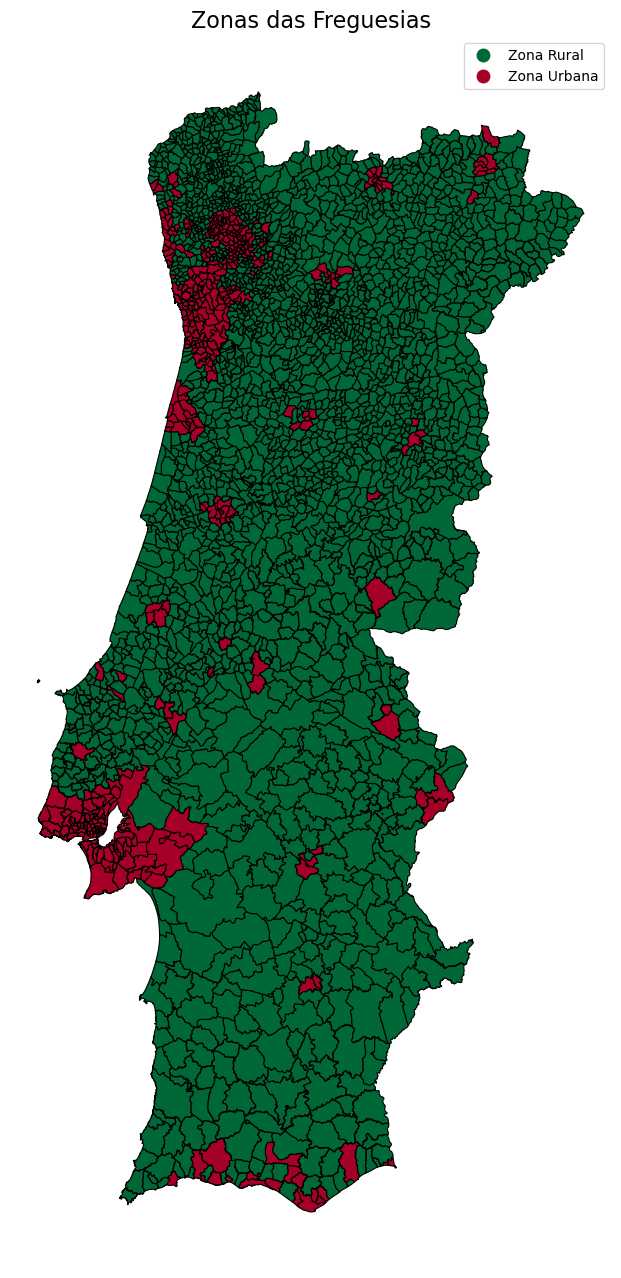

In [62]:
# Configurar a figura e o eixo
fig, ax = plt.subplots(figsize=(20, 16))

# Plotar o mapa das freguesias
Freguesia.plot(column='Zona', cmap = "RdYlGn_r", linewidth=0.8, edgecolor='black', ax=ax, legend=True)

# Adicionar título
ax.set_title('Zonas das Freguesias', fontsize=16)

# Remover os eixos
ax.set_axis_off()

plt.savefig('ZonasRurais.png', format='png', bbox_inches='tight')

# Exibir o mapa
plt.show()

In [ ]:
# Agrupar e contar o número de ocorrências de 'Zona' por 'Distrito' e 'Concelho'
ZonasEpicas = Freguesia.groupby(['Distrito', 'Concelho', 'Zona']).size().unstack(fill_value=0)

# Reinicie o índice para torná-lo plano
ZonasEpicas.reset_index(inplace=True)

ZonasEpicas

In [ ]:
ZonasEpicas.to_csv('ZonasCount.csv', index=False, header=True)